## 1. decorator

### 1. 클래스

#### 1.1 클래스 속성 사용하기

In [1]:
class Person:
    bag = []
    
    def put_bag(self, stuff):
        self.bag.append(stuff)

이제 두개의 인스턴스를 만들고 put_bag 메서드를 사용한다.

In [2]:
james = Person()
james.put_bag('책')

In [3]:
james.bag

['책']

In [4]:
maria = Person()
maria.put_bag('열쇠')

In [5]:
print(james.bag)
print(maria.bag)

['책', '열쇠']
['책', '열쇠']


- 인스턴스를 만들고 각자 메서드를 사용했는데 결과가 같다.  
- **클래스 속성은 클래스에 속해 있으면 모든 인스턴스에서 공유한다.**

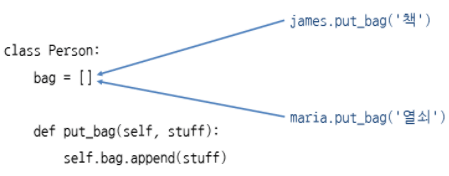

앞에 put_bag 메서드 안에서 append를 할 떄 `self.bag`을 사용했다.

In [6]:
class Person:
    bag = []
    
    def put_bag(self, stuff):
        self.bag.append(stuff)

그런데 클래스를 접근할 때는 명확하게 클래스 이름을 사용하는 것이 명확하다.

In [7]:
class Person:
    bag = []
 
    def put_bag(self, stuff):
        Person.bag.append(stuff)    # 클래스 이름으로 클래스 속성에 접근

In [9]:
james = Person()
james.put_bag('책')

maria = Person()
maria.put_bag('열쇠')

In [10]:
print(Person.bag)

['책', '열쇠']


**참 고 : **속성, 메서드 이름을 찾는 순서  
    
파이썬에서는 속성, 메서드 이름을 찾을 때 인스턴스, 클래스 순으로 찾습니다. 그래서 인스턴스 속성이 없으면 클래스 속성을 찾게 되므로 james.bag, maria.bag도 문제 없이 동작합니다. 겉보기에는 인스턴스 속성을 사용하는 것 같지만 실제로는 클래스 속성입니다.

인스턴스와 클래스에서 __dict__ 속성을 출력해보면 현재 인스턴스와 클래스의 속성을 딕셔너리로 확인할 수 있습니다.

인스턴스.__dict__

클래스.__dict__

In [11]:
james.__dict__

{}

In [12]:
Person.__dict__

mappingproxy({'__module__': '__main__',
              'bag': ['책', '열쇠'],
              'put_bag': <function __main__.Person.put_bag(self, stuff)>,
              '__dict__': <attribute '__dict__' of 'Person' objects>,
              '__weakref__': <attribute '__weakref__' of 'Person' objects>,
              '__doc__': None})

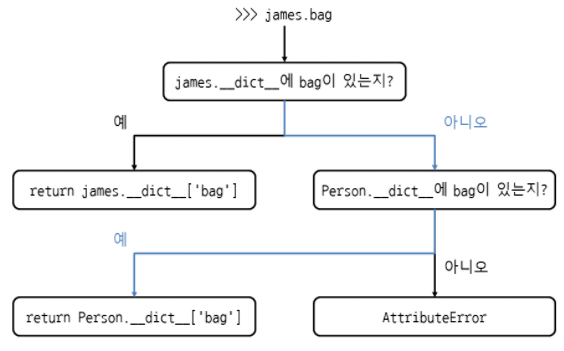

#### 1.2 인스턴스 속성 사용하기

가방을 여러사람이 공유하지 않으려면 bag을 인스턴스 속성으로 만들면 된다.

In [13]:
class Person:
    def __init__(self):
        self.bag = []
        
    def put_bag(self, stuff):
        self.bag.append(stuff)

In [14]:
james = Person()
james.put_bag('책')
 
maria = Person()
maria.put_bag('열쇠')
 
print(james.bag)
print(maria.bag)

['책']
['열쇠']


이제 클래스 속성과 인스턴스 속성의 차이점을 정리해보겠습니다.

- 클래스 속성: 모든 인스턴스가 공유. 인스턴스 전체가 사용해야 하는 값을 저장할 때 사용
- 인스턴스 속성: 인스턴스별로 독립되어 있음. 각 인스턴스가 값을 따로 저장해야 할 때 사용

#### 1.3 비공개 클래스 속성 사용

클래스 속성을 만들 때 __속성과 같이 __(밑줄 두 개)로 시작하면 비공개 속성이 됩니다.

예를 들어 기사 게임 캐릭터는 아이템을 최대 10개만 가질수 있다고 하면

In [15]:
class Knight:
    __item_limit = 10 # 비공개 클래스 속성
    
    def print_item_limit(self):
        print(Knight.__item_limit)

In [16]:
x = Knight()
x.print_item_limit()

10


In [17]:
print(Knight.__item_limit)    # 클래스 바깥에서는 접근할 수 없음

AttributeError: type object 'Knight' has no attribute '__item_limit'

**참 고 :** 독스트링 사용하기

함수와 마찬가지로 클래스와 메서드도 독스트링을 사용할 수 있습니다. 다음과 같이 클래스와 메서드를 만들 때 :(콜론) 바로 다음 줄에 """ """(큰따옴표 세 개) 또는 ''' '''(작은따옴표 세 개)로 문자열을 입력하면 됩니다. 그리고 클래스의 독스트링은 클래스.__doc__ 형식으로 사용하고, 메서드의 독스트링은 클래스.메서드.__doc__ 또는 인스턴스.메서드.__doc__ 형식으로 사용합니다.

In [18]:
class Person:
    '''사람 클래스입니다.'''
    
    def greeting(self):
        '''인사 메서드입니다.'''
        print('Hello')

In [19]:
print(Person.__doc__)

사람 클래스입니다.


In [20]:
print(Person.greeting.__doc__)

인사 메서드입니다.


In [21]:
maria = Person()

In [23]:
print(maria.__doc__)

사람 클래스입니다.


In [24]:
print(maria.greeting.__doc__)

인사 메서드입니다.


#### 정적 메서드 사용하기

지금까지 클래스의 메서드를 사용할 때 인스턴스를 통해서 호출했습니다.   
이번에는 인스턴스를 통하지 않고 클래스에서 바로 호출할 수 있는 정적 메서드와 클래스 메서드에 대해 알아보겠습니다.

**먼저 정적 메서드입니다.   
정적 메서드는 다음과 같이 메서드 위에 @staticmethod를 붙입니다.  
이때 정적 메서드는 매개변수에 self를 지정하지 않습니다.**

@staticmethod처럼 앞에 @이 붙은 것을 데코레이터라고 하며 메서드(함수)에 추가 기능을 구현할 때 사용합니다.

In [26]:
class Calc:
    @staticmethod
    def add(a, b):
        print(a + b)
        
    @staticmethod
    def mul(a, b):
        print(a*b)

In [28]:
Calc.add(10, 20)    # 클래스에서 바로 메서드 호출
Calc.mul(10, 20)    # 클래스에서 바로 메서드 호출

30
200


- Calc 클래스에서 @staticmethod를 붙여서 add 메서드와 mul 메서드를 만들었습니다.

- 정적 메서드는 self를 받지 않으므로 인스턴스 속성에는 접근할 수 없습니다.  
- 그래서 보통 정적 메서드는 인스턴스 속성, 인스턴스 메서드가 필요 없을 때 사용합니다.

- 여기서 만든 Calc 클래스에 들어있는 add, mul 메서드는 숫자 두개를 받아서 더하거나 곱할 뿐 인스턴스의 속성은 필요하지 않습니다.

그러면 어떤 것을 정적 메서드로 만들어야 하나?  
- 메서드 실행이 외부 상태에 영향을 끼지지 않는 순수 함수를 만들때   
- 즉, 인스턴스의 상태변화를 시키지 않는 메서드를 만들 때

**참 고 :** 파이썬 자료형의 인스턴스 메서드와 정적 메서드

In [29]:
a = {1, 2, 3, 4}

a.update({5})    # 인스턴스 메서드

In [30]:
set.union({1, 2, 3, 4}, {5})    # 정적(클래스) 메서드

{1, 2, 3, 4, 5}

#### 1.4 클래스 메서드 사용하기

정적 메서드와 비슷하지만 약간의 차이점이 있는 클래스 메서드

In [31]:
class Person:
    count = 0    # 클래스 속성
 
    def __init__(self):
        Person.count += 1    # 인스턴스가 만들어질 때
                             # 클래스 속성 count에 1을 더함, Person클래스에 접근한다고 명확하게 명시함
 
    @classmethod
    def print_count(cls):
        print('{0}명 생성되었습니다.'.format(cls.count))    # cls로 클래스 속성에 접근

In [32]:
james = Person()
maria = Person()

In [33]:
Person.print_count()

2명 생성되었습니다.


@classmethod  
    def print_count(cls):  
        print('{0}명 생성되었습니다.'.format(cls.count))    # cls로 클래스 속성에 접근  

그런데 위에서 @classmethod를 붙였다.  
첫번째 매개변수가 cls인데 여기에 현재 클래스가 들어간다.

클래스 메서드는 정적 메서드처럼 인스턴스 없이 호출할 수 있다는 점은 같습니다. 하지만 클래스 메서드는 메서드 안에서 클래스 속성, 클래스 메서드에 접근해야 할 때 사용합니다.

아래에서 cls를 사요하면 현재 클래스의 인스턴스도 만들수 있다.  
cls는 클래스이므로 cls()는 Person()과 같다.

    @classmethod  
    def create(cls):  
        p = cls()    # cls()로 인스턴스 생성
        return p  

### 2. 데코레이터

#### 2.1 데코레이터 사용하기

In [34]:
def hello():
    print('hello 함수 시작')
    print('hello')
    print('hello 함수 끝')
 
def world():
    print('world 함수 시작')
    print('world')
    print('world 함수 끝')

In [35]:
hello()
world()

hello 함수 시작
hello
hello 함수 끝
world 함수 시작
world
world 함수 끝


만약 다른 함수도 시작과 끝을 출력하고 싶다면,  
만들 때마다 print를 넣어야 한다.  
번거롭다.  
이때 데코레이터를 넣으면 된다.

In [36]:
def trace(func): # 호출할 함수를 매개변수로..
    def wrapper(): # 호출할 함수를 감싸는 함수
        print(func.__name__, '함수 시작') #__name__으로 함수이름 출력
        func() # 매개변수로 받은 함수 호출
        print(func.__name__, '함수 끝')
    
    return wrapper # wrapper 함수 반환 

In [37]:
def hello():
    print('hello')
 
def world():
    print('world')

In [38]:
trace_hello = trace(hello)    # 데코레이터에 호출할 함수를 넣음
trace_hello()                 # 반환된 함수를 호출

hello 함수 시작
hello
hello 함수 끝


In [39]:
trace_world = trace(world)    # 데코레이터에 호출할 함수를 넣음
trace_world()                 # 반환된 함수를 호출

world 함수 시작
world
world 함수 끝


이제 데코레이터를 사용해보자. 호출할 함수위에 @데코레이터 형식으로 지정한다.

In [40]:
def trace(func):                             # 호출할 함수를 매개변수로 받음
    def wrapper():
        print(func.__name__, '함수 시작')    # __name__으로 함수 이름 출력
        func()                               # 매개변수로 받은 함수를 호출
        print(func.__name__, '함수 끝')
    return wrapper                           # wrapper 함수 반환

In [41]:
@trace    # @데코레이터
def hello():
    print('hello')
 
@trace    # @데코레이터
def world():
    print('world')

In [42]:
hello()

hello 함수 시작
hello
hello 함수 끝


In [43]:
world()

world 함수 시작
world
world 함수 끝


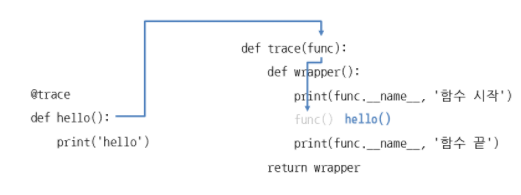

이렇게 함수를 감싸는 형태로 구성되어있다.   
따라서 데코레이터는 기존 함수를 수정하지 않으면서 추가 기능을 구현할 때 사용한다.

**참고 :** 데코레이터 여러개 지정하기

In [44]:
def decorator1(func):
    def wrapper():
        print('decorator1')
        func()
    return wrapper
 
def decorator2(func):
    def wrapper():
        print('decorator2')
        func()
    return wrapper

In [45]:
# 데코레이터를 여러 개 지정
@decorator1
@decorator2
def hello():
    print('hello')

어떤 순서로 호출될 까

In [47]:
hello()

decorator1
decorator2
hello


@을 사용하지 않았을 때는 다음 코드와 동작이 같습니다.

In [51]:
def hello():
    print('hello')

In [52]:
decorated_hello = decorator1(decorator2(hello))

In [53]:
decorated_hello()

decorator1
decorator2
hello


#### 2.2 매개변수와 반환값을 처리하는 데코레이터

지금까지 매개변수와 반환값이 없는 함수의 데코레이터를 만들었습니다. 
이번에는 매개변수와 반환값을 처리하는 데코레이터는 어떻게 만드는지 알아보겠습니다.

In [54]:
def trace(func):          # 호출할 함수를 매개변수로 받음
    def wrapper(a, b):    # 호출할 함수 add(a, b)의 매개변수와 똑같이 지정
        r = func(a, b)    # func에 매개변수 a, b를 넣어서 호출하고 반환값을 변수에 저장
        print('{0}(a={1}, b={2}) -> {3}'.format(func.__name__, a, b, r))  # 매개변수와 반환값 출력
        return r          # func의 반환값을 반환
    return wrapper        # wrapper 함수 반환

In [55]:
@trace
def add(a, b):
    return a + b

In [56]:
print(add(10, 20))

add(a=10, b=20) -> 30
30


add 함수를 호출했을 때 데코레이터를 통해서 매개변수와 반환값이 출력되었습니다. 매개변수와 반환값을 처리하는 데코레이터를 만들 때는 먼저 안쪽 wrapper 함수의 매개변수를 호출할 함수 add(a, b)의 매개변수와 똑같이 만들어줍니다.

만약 wrapper 함수에서 func의 반환값을 반환하지 않으면 add 함수를 호출해도 반환값이 나오지 않으므로 주의해야 합니다.  
참고로 wrapper 함수에서 func의 반환값을 출력할 필요가 없으면 return func(a, b)처럼 func를 호출하면서 바로 반환해도 됩니다.

**참 고 :** 가변인수 데코레이터

 wrapper 함수를 가변 인수 함수로 만들면 됩니다.

In [57]:
def trace(func):                     # 호출할 함수를 매개변수로 받음
    def wrapper(*args, **kwargs):    # 가변 인수 함수로 만듦
        r = func(*args, **kwargs)    # func에 args, kwargs를 언패킹하여 넣어줌
        print('{0}(args={1}, kwargs={2}) -> {3}'.format(func.__name__, args, kwargs, r))
                                     # 매개변수와 반환값 출력
        return r                     # func의 반환값을 반환
    return wrapper

In [58]:
@trace                   # @데코레이터
def get_max(*args):      # 위치 인수를 사용하는 가변 인수 함수
    return max(args)
 
@trace                   # @데코레이터
def get_min(**kwargs):   # 키워드 인수를 사용하는 가변 인수 함수
    return min(kwargs.values())

In [59]:
print(get_max(10, 20))
print(get_min(x=10, y=20, z=30))

get_max(args=(10, 20), kwargs={}) -> 20
20
get_min(args=(), kwargs={'x': 10, 'y': 20, 'z': 30}) -> 10
10


**참 고 :** 메서드에 데코레이터 만들기  
    
클래스를 만들면서 메서드에 데코레이터를 사용할 때는 self를 주의해야 합니다.  
인스턴스 메서드는 항상 self를 받으므로 데코레이터를 만들 때도 wrapper 함수의 첫 번째 매개변수는 self로 지정해야 합니다(클래스 메서드는 cls).  
마찬가지로 func를 호출할 때도 self와 매개변수를 그대로 넣어야 합니다.

In [60]:
def trace(func):
    def wrapper(self, a, b):   # 호출할 함수가 인스턴스 메서드이므로 첫 번째 매개변수는 self로 지정
        r = func(self, a, b)   # self와 매개변수를 그대로 넣어줌
        print('{0}(a={1}, b={2}) -> {3}'.format(func.__name__, a, b, r))   # 매개변수와 반환값 출력
        return r               # func의 반환값을 반환
    return wrapper

In [61]:
class Calc:
    @trace
    def add(self, a, b):
        return a + b

In [62]:
c = Calc()

In [63]:
print(c.add(10, 20))

add(a=10, b=20) -> 30
30


#### 2.3 매개변수가 있는 데코레이터 

In [64]:
def is_multiple(x):              # 데코레이터가 사용할 매개변수를 지정
    def real_decorator(func):    # 호출할 함수를 매개변수로 받음
        def wrapper(a, b):       # 호출할 함수의 매개변수와 똑같이 지정
            r = func(a, b)       # func를 호출하고 반환값을 변수에 저장
            if r % x == 0:       # func의 반환값이 x의 배수인지 확인
                print('{0}의 반환값은 {1}의 배수입니다.'.format(func.__name__, x))
            else:
                print('{0}의 반환값은 {1}의 배수가 아닙니다.'.format(func.__name__, x))
            return r             # func의 반환값을 반환
        return wrapper           # wrapper 함수 반환
    return real_decorator        # real_decorator 함수 반환

In [65]:
@is_multiple(3)     # @데코레이터(인수)
def add(a, b):
    return a + b

In [66]:
print(add(10, 20))
print(add(2, 5))

add의 반환값은 3의 배수입니다.
30
add의 반환값은 3의 배수가 아닙니다.
7


### 3. 클래스로 데코레이터 만들기

클래스를 활용할 때는 인스턴스를 함수처럼 호출하게 해주는 __call__ 메서드를 구현해야 합니다.

In [67]:
class Trace:
    def __init__(self, func):    # 호출할 함수를 인스턴스의 초깃값으로 받음
        self.func = func         # 호출할 함수를 속성 func에 저장
 
    def __call__(self):
        print(self.func.__name__, '함수 시작')    # __name__으로 함수 이름 출력
        self.func()                               # 속성 func에 저장된 함수를 호출
        print(self.func.__name__, '함수 끝')

In [68]:
@Trace
def hello():
    print('hello')

In [69]:
hello()

hello 함수 시작
hello
hello 함수 끝


- 클래스로 데코레이터를 만들 때는 먼저 __init__ 메서드를 만들고 호출할 함수를 초깃값으로 받습니다.   
- 그리고 매개변수로 받은 함수를 속성으로 저장합니다.

- 이제 인스턴스를 호출할 수 있도록 __call__ 메서드를 만듭니다.  
- __call__ 메서드에서는 함수의 시작을 알리는 문자열을 출력하고, 속성 func에 저장된 함수를 호출합니다.   
- 그다음에 함수의 끝을 알리는 문자열을 출력합니다.

참고로 클래스로 만든 데코레이터는 @을 지정하지 않고, 데코레이터의 반환값을 호출하는 방식으로도 사용할 수 있습니다. 다음과 같이 데코레이터에 호출할 함수를 넣어서 인스턴스를 생성한 뒤 인스턴스를 호출해주면 됩니다. 즉, 클래스에 __call__ 메서드를 정의했으므로 함수처럼 ( )(괄호)를 붙여서 호출할 수 있습니다.

In [70]:
def hello():    # @데코레이터를 지정하지 않음
    print('hello')
 
trace_hello = Trace(hello)    # 데코레이터에 호출할 함수를 넣어서 인스턴스 생성
trace_hello()                 # 인스턴스를 호출. __call__ 메서드가 호출됨

hello 함수 시작
hello
hello 함수 끝


#### 클래스로 매개변수와 반환값을 처리하는 데코레이터 만들기

- https://dojang.io/mod/page/view.php?id=2431